In [32]:
#Load in Data and Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

data = pd.read_csv("Ames.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [34]:
#Clean data by removing columns with too many NAs and droping rows with NAs
data = data.drop(["Alley","MiscFeature","Fence","PoolQC","Id"], axis=1)
data = data.dropna()
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000
11,60,RL,85.0,11924,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,New,Partial,345000
13,20,RL,91.0,10652,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,New,Partial,279500
20,60,RL,101.0,14215,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,11,2006,New,Partial,325300


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 1 to 1457
Data columns (total 76 columns):
MSSubClass       583 non-null int64
MSZoning         583 non-null object
LotFrontage      583 non-null float64
LotArea          583 non-null int64
Street           583 non-null object
LotShape         583 non-null object
LandContour      583 non-null object
Utilities        583 non-null object
LotConfig        583 non-null object
LandSlope        583 non-null object
Neighborhood     583 non-null object
Condition1       583 non-null object
Condition2       583 non-null object
BldgType         583 non-null object
HouseStyle       583 non-null object
OverallQual      583 non-null int64
OverallCond      583 non-null int64
YearBuilt        583 non-null int64
YearRemodAdd     583 non-null int64
RoofStyle        583 non-null object
RoofMatl         583 non-null object
Exterior1st      583 non-null object
Exterior2nd      583 non-null object
MasVnrType       583 non-null object
MasVnrArea 

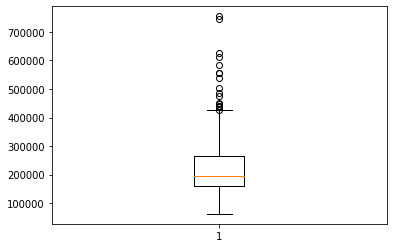

In [39]:
#Observe outliers for price
plt.boxplot(data["SalePrice"])

In [31]:
#outlierData= data
#outlierData["SalePrice_Zscore"] = (outlierData["SalePrice"] - np.mean(outlierData["SalePrice"])) / np.std(outlierData["SalePrice"])
#outlierData[abs(outlierData["SalePrice_Zscore"]) > 3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_Zscore
178,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,7,2009,New,Partial,501837,3.024086
440,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,170,0,0,4,2009,WD,Normal,555000,3.600161
691,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,2007,WD,Normal,755000,5.767362
769,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,0,210,0,0,6,2010,WD,Normal,538000,3.415948
803,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,192,0,0,1,2009,New,Partial,582933,3.902843
898,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,New,Partial,611657,4.214096
1046,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,7,2006,New,Partial,556581,3.617292
1169,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,7,2006,WD,Normal,625000,4.358681
1182,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,555,0,7,2007,WD,Abnorml,745000,5.659002


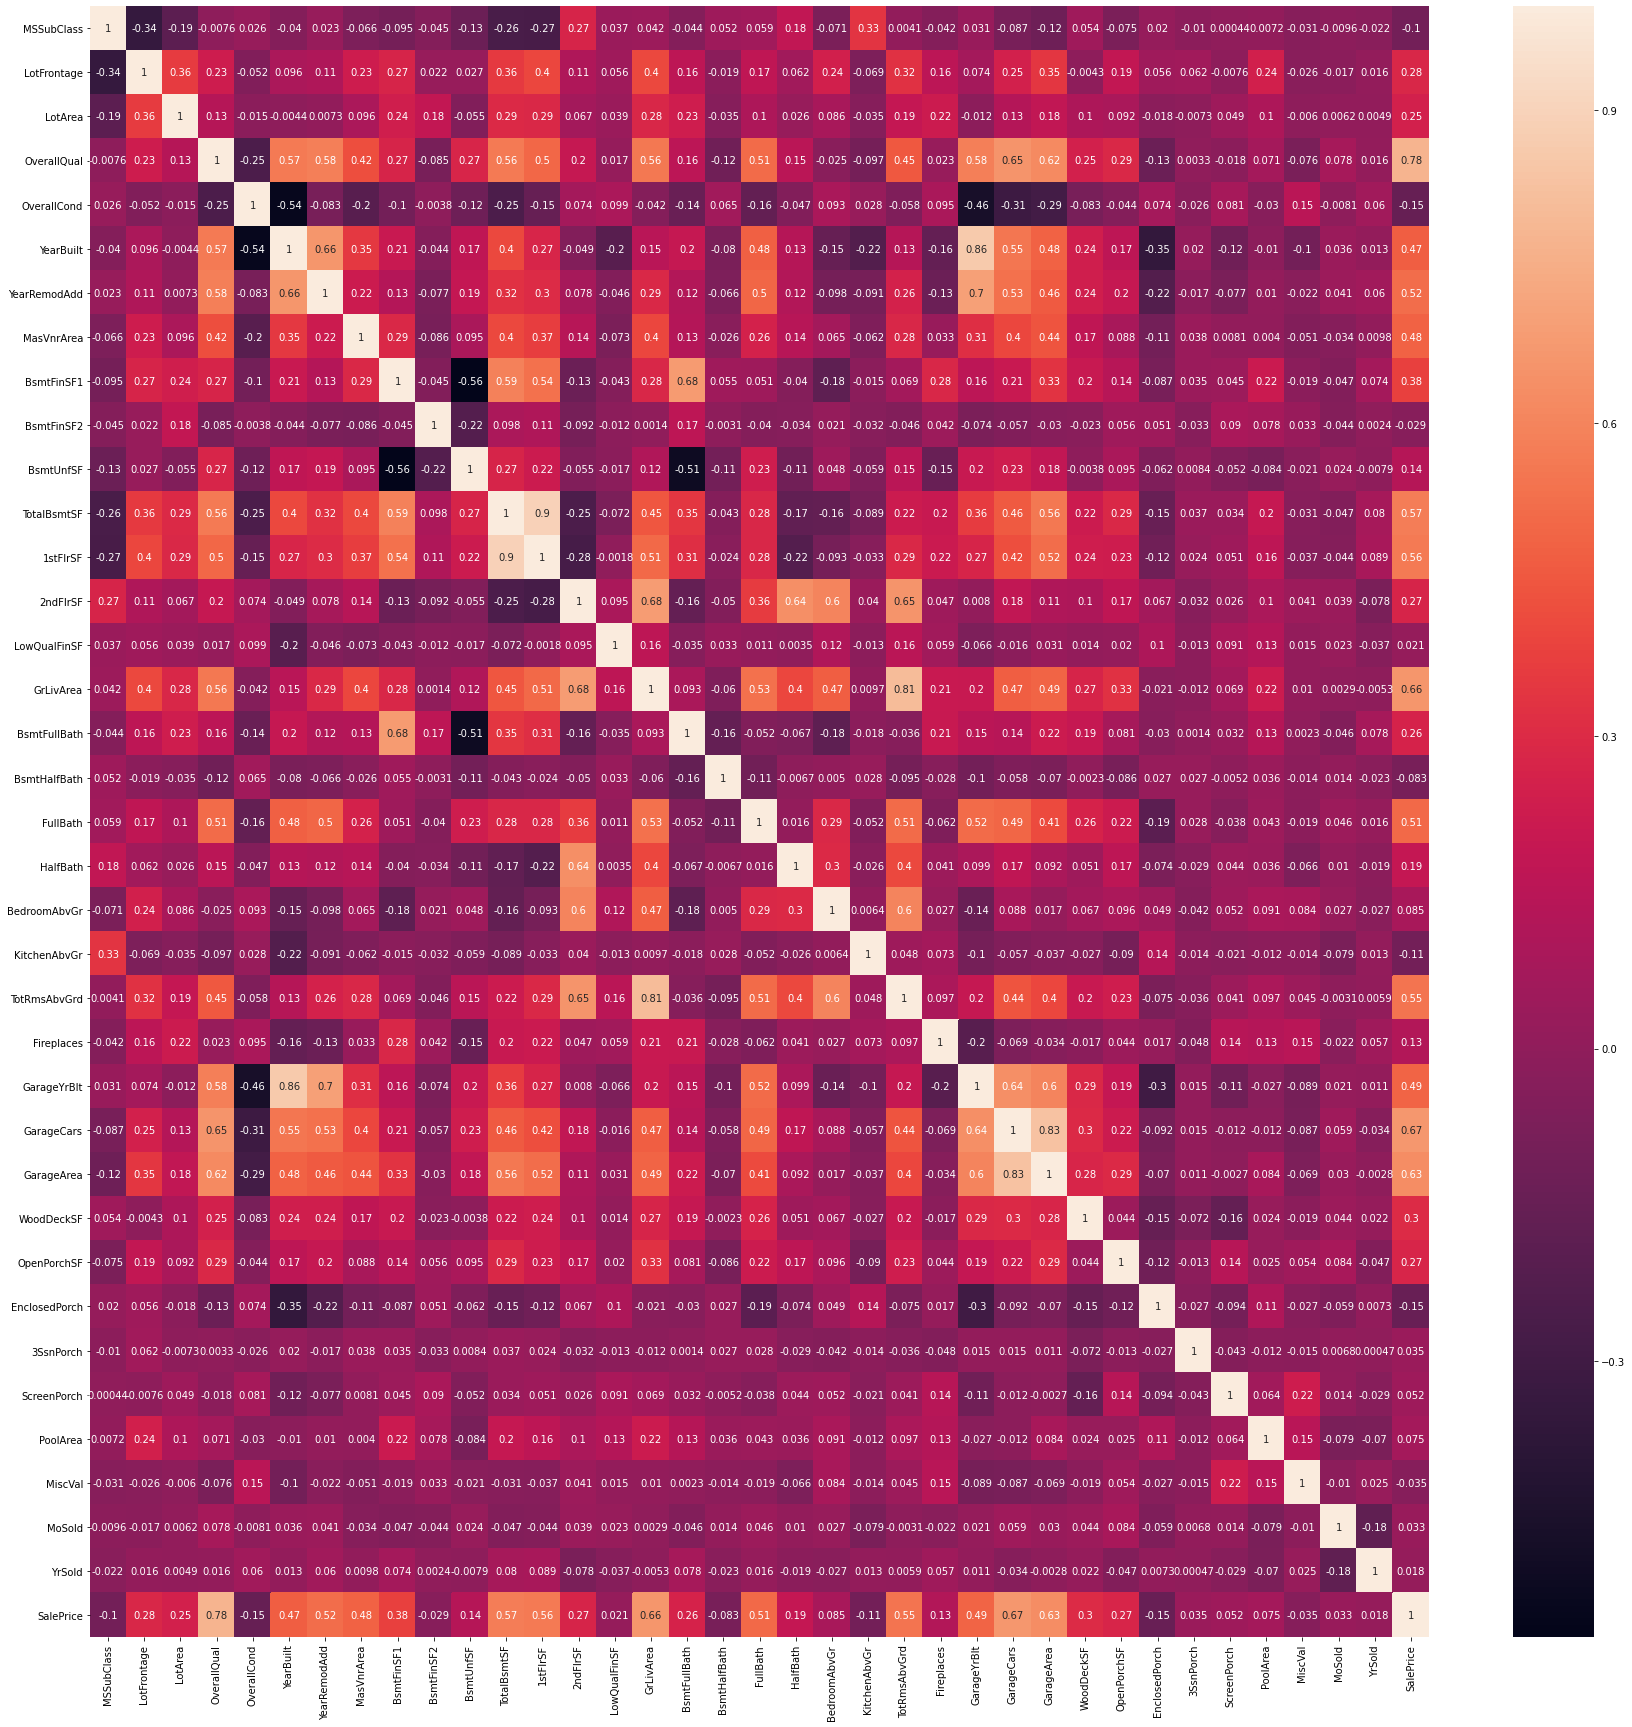

In [38]:
#Observe colinearity between features
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)

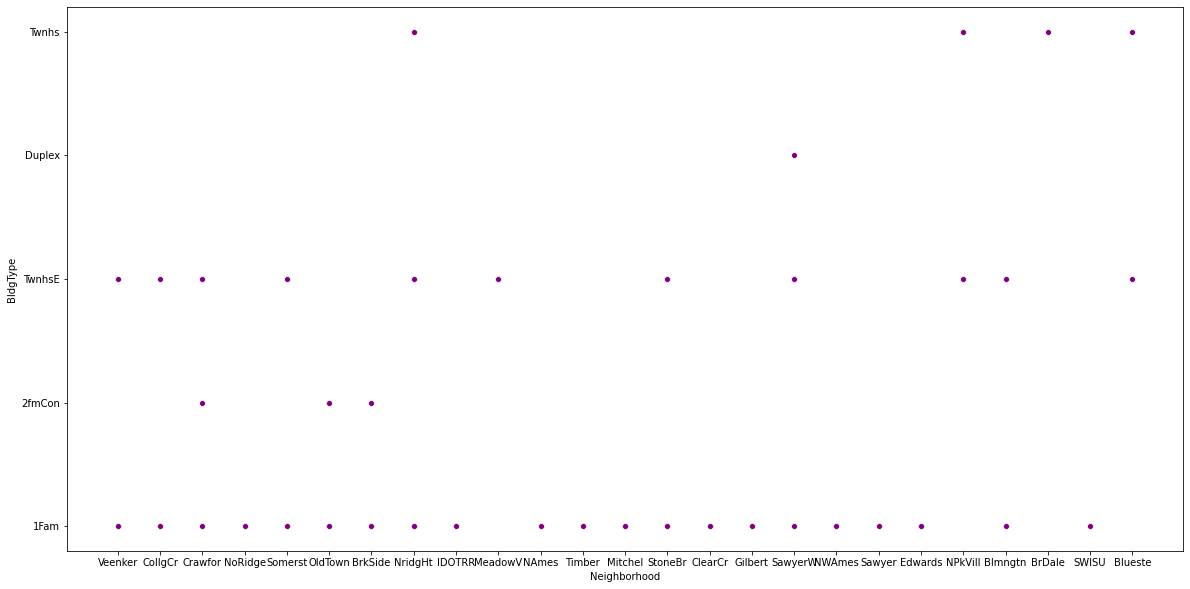

In [41]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=data.BldgType,x=data.Neighborhood, color="purple")

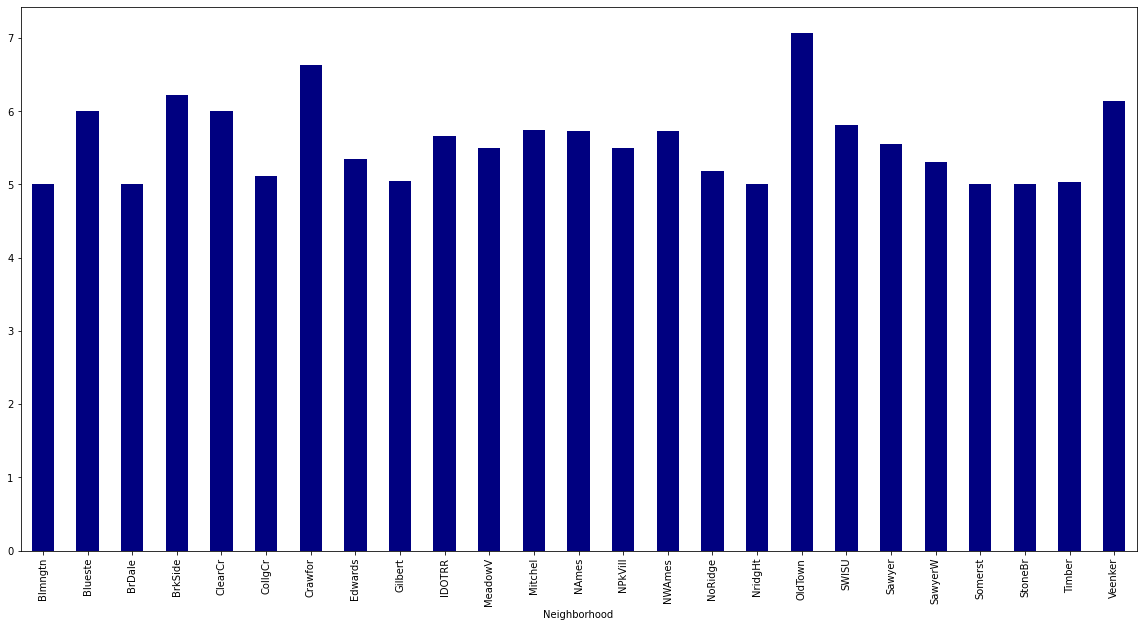

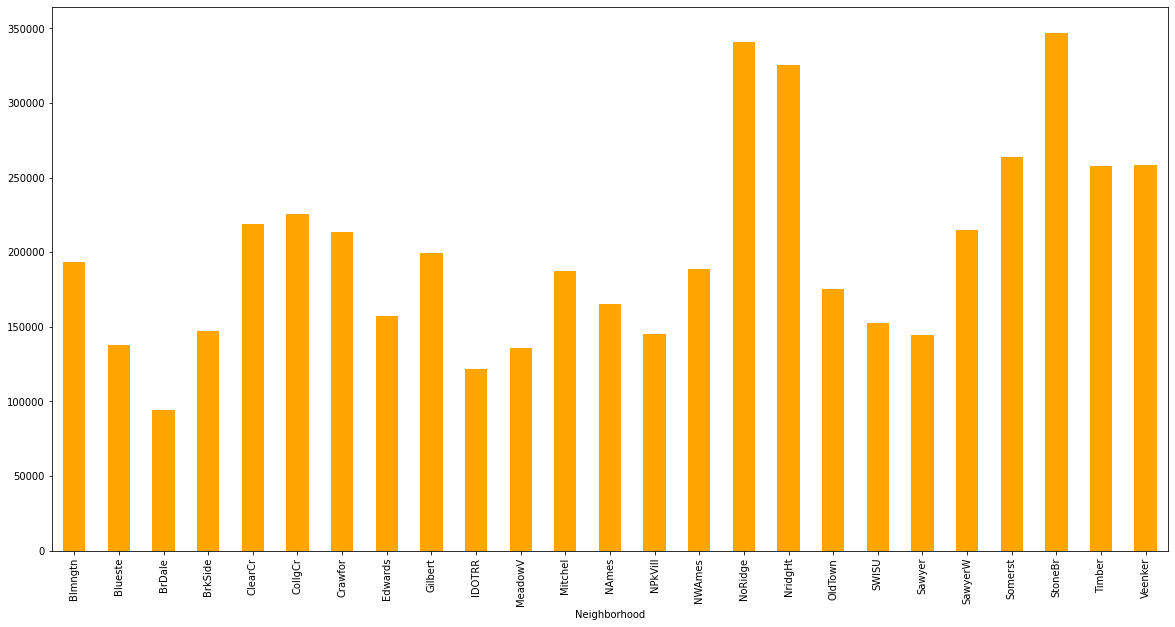

In [42]:
#Average House Condition per neighborhood
plt.figure(figsize=(20,10))
rel = data.groupby("Neighborhood")["OverallCond"].mean()
rel.plot.bar(color="navy")

plt.figure(figsize=(20,10))
rel = data.groupby("Neighborhood")["SalePrice"].mean()
rel.plot.bar(color="orange")

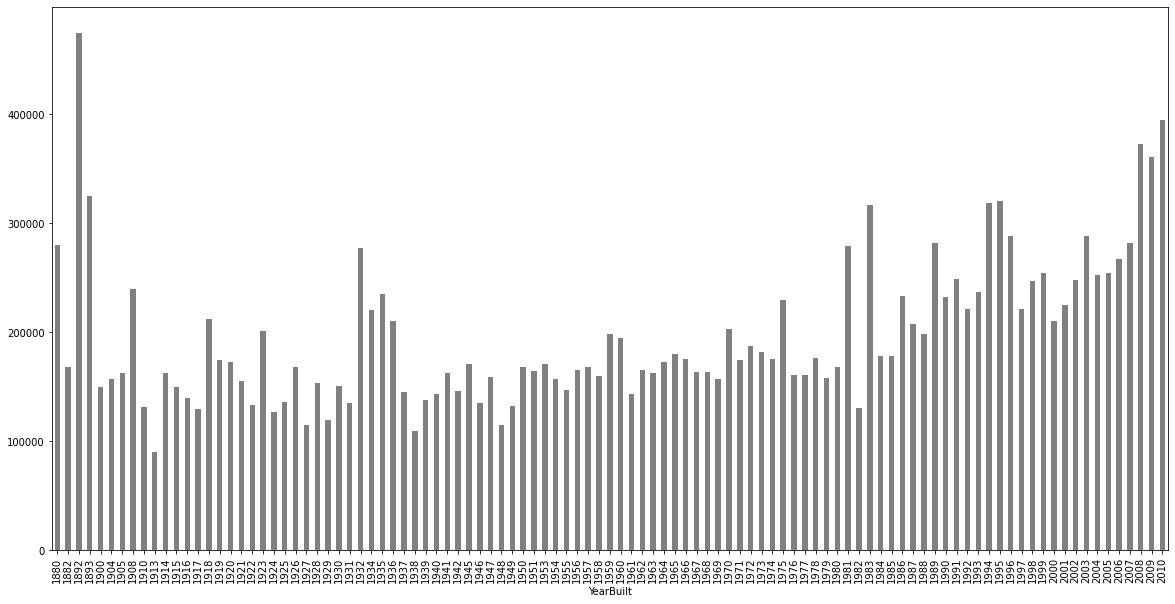

In [43]:
plt.figure(figsize=(20,10))
rel = data.groupby("YearBuilt")["SalePrice"].mean()
rel.plot.bar(color="grey")

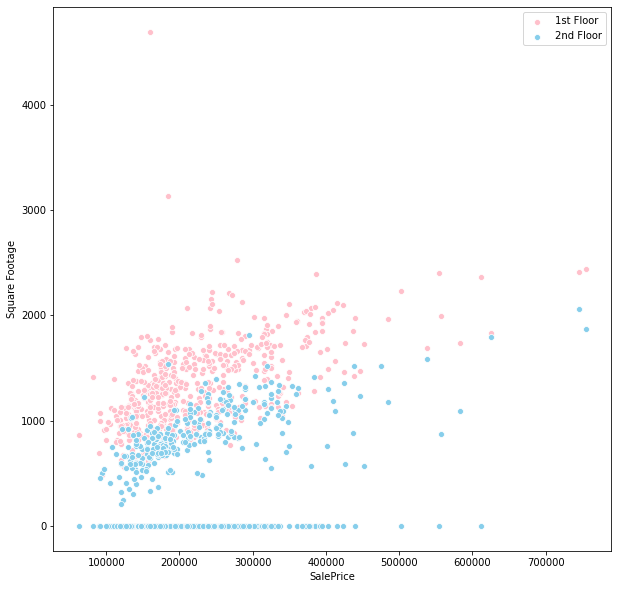

In [40]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
x = np.linspace(100, 10, 1000)
sns.scatterplot(x=data["SalePrice"], y=data["1stFlrSF"], color='pink')
sns.scatterplot(x=data["SalePrice"], y=data["2ndFlrSF"], color='skyblue')
plt.ylabel("Square Footage")
plt.legend(["1st Floor", "2nd Floor"])

In [12]:
data = data
X=data.iloc[:,:-1] #Set X to dataframe 
y = data.iloc[:,-1] #Set y to prices

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

catCols = data.columns.drop(data._get_numeric_data().columns)#Grab all columns sotring String data (All categorical)
X_counts = ColumnTransformer([('encoder', OneHotEncoder(), catCols)], remainder='passthrough').fit_transform(X)

print(X.shape)
print(X_counts.shape)

(583, 75)
(583, 247)


In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.25, random_state=1)

model = linear_model.Lasso().fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_predict))
print("R2 Score: %.3f" % r2_score(y_test, y_predict))

Mean Squared Error: 1470097485.762
R2 Score: 0.829


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132166559247.60591, tolerance: 370615792.1934051
  positive)


In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.25, random_state=1)

model = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_predict))
print("R2 Score: %.3f" % r2_score(y_test, y_predict))

Mean Squared Error: 1595360482.191
R2 Score: 0.815


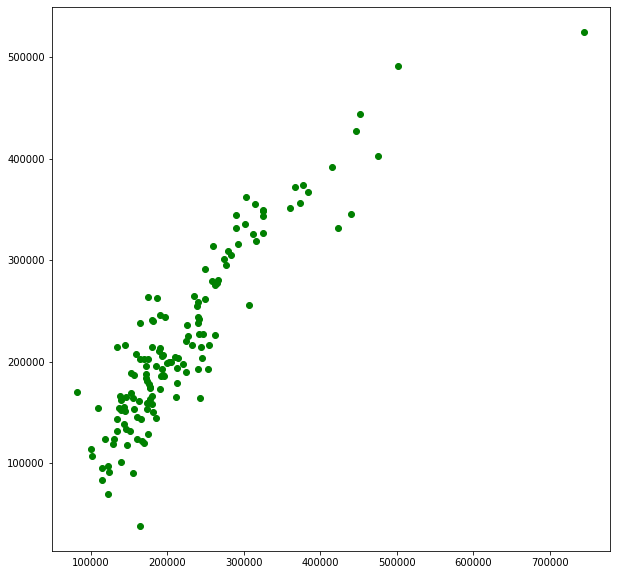

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, model.predict(X_test),color="green")
plt.show()

In [17]:
#X_test.to_csv('X_test.csv',index=False)
#y_test.to_csv('y_test.csv',index=False)
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

In [18]:
from joblib import dump, load
dump(model, 'AmesReg.joblib') 

['AmesReg.joblib']

In [25]:
from joblib import dump, load
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

model = load('AmesReg.joblib')
X2 = pd.read_csv("test.csv")

X2 = X2.drop(["Alley","MiscFeature","Fence","PoolQC","Id"], axis=1)
X2 = X2.dropna()

catCols = X2.columns.drop(X2._get_numeric_data().columns)#Grab all columns sotring String data (All categorical)
X2 = ColumnTransformer([('encoder', OneHotEncoder(), catCols)], remainder='passthrough').fit_transform(X)

model.predict(X2)

array([240615.15646046, 184803.84396859, 139400.06516047, 291724.62007503,
       255908.0120496 , 119189.69150958, 118000.00000042, 398729.04980769,
       247217.86865102, 327316.83166962, 128509.645406  , 214830.74048137,
       129474.81621932, 277743.33727541, 299054.62460313, 211594.7256642 ,
       148782.54280502, 295417.87914545, 319370.49944058, 168902.04202376,
       135742.52110416, 197873.16227385, 303286.36911253, 233799.65062225,
       117108.70465243, 384762.41647795, 100128.78696292, 192297.84519054,
       474396.0066906 , 199414.60092978, 299163.33686788, 189850.32950189,
       297217.16980643, 178554.57875787, 205570.33064971, 231091.99507801,
       297329.66163138, 169343.86509341, 214628.13108427, 174666.78622218,
       261421.37805834, 213923.5085959 , 367560.79457251, 265692.65464765,
       202095.20245982, 333514.89036322, 169340.23416614, 151033.64289678,
       118700.60701707, 236310.89085049, 169177.10418826, 172065.91487012,
       230976.51520262, 3

In [ ]:
#Prediction Script
from joblib import dump, load
model = load('AmesReg.joblib')

MSSubClass = input()
MSZoning = input()
LotFrontage = input()
LotArea = input()
Street = input()
LotShape = input()
LandContour = input()
Utilities = input()
LotConfig = input()
LandSlope = input()
Neighborhood = input()
Condition1 = input()
Condition2 = input()
BldgType = input()
HouseStyle = input()
OverallQual = input()
OverallCond = input()
YearBuilt = input()
YearRemodAdd = input()
RoofStyle = input()
RoofMatl = input()
Exterior1st = input()
Exterior2nd = input()
MasVnrType = input()
MasVnrArea = input()
ExterQual = input()
ExterCond = input()
Foundation = input()
BsmtQual = input()
BsmtCond = input()
BsmtExposure = input()
BsmtFinType1 = input()
BsmtFinSF1 = input()
BsmtFinType2 = input()
BsmtFinSF2 = input()
BsmtUnfSF = input()
TotalBsmtSF = input()
Heating = input()
HeatingQC = input()
CentralAir = input()
Electrical = input()
FirstFlrSF = input()
SecondFlrSF = input()
LowQualFinSF = input()
GrLivArea = input()
BsmtFullBath = input()
BsmtHalfBath = input()
FullBath = input()
HalfBath = input()
BedroomAbvGr = input()
KitchenAbvGr = input()
KitchenQual = input()
TotRmsAbvGrd = input()
Functional = input()
Fireplaces = input()
FireplaceQu = input()
GarageType = input()
GarageYrBlt = input()
GarageFinish = input()
GarageCars = input()
GarageArea = input()
GarageQual = input()
GarageCond = input()
PavedDrive = input()
WoodDeckSF = input()
OpenPorchSF = input()
EnclosedPorch = input()
ThreeSsnPorch = input()
ScreenPorch = input()
PoolArea = input()
MiscVal = input()
MoSold = input()
YrSold = input()
SaleType = input()
SaleCondition = input()
SalePrice = input()

ames_df = pd.DataFrame({ "MSSubClass" : MSSubClass, "MSZoning" : MSZoning, "LotFrontage" : LotFrontage , "LotArea" : LotArea, "Street" : Street,
              "LotShape" : LotShape, "LandContour" : LandContour, "Utilities" : Utilities, "LotConfig" : LotConfig, 
              "LandSlope" : LandSlope, "Neighborhood" : Neighborhood, "Condition1" : Condition1, "Condition2" : Condition2,
              "BldgType" : BldgType,"HouseStyle" : HouseStyle, "OverallQual" : OverallQual, "OverallCond" : OverallCond, 
              "YearBuilt" :YearBuilt, "YearRemodAdd" : YearRemodAdd, "RoofStyle" : RoofStyle,
              "RoofMatl" : RoofMatl, "Exterior1st" : Exterior1st, "Exterior2nd" : Exterior2nd, "MasVnrType" : MasVnrType,
              "MasVnrArea" : MasVnrArea, "ExterQual" : ExterQual, "ExterCond" : ExterCond, "Foundation" : Foundation, 
              "BsmtQual" : BsmtQual, "BsmtCond" :BsmtCond, "BsmtExposure" : BsmtExposure, "BsmtFinType1" : BsmtFinType1,
              "BsmtFinSF1" : BsmtFinSF1, "BsmtFinType2" : BsmtFinType2, "BsmtFinSF2" : BsmtFinSF2, "BsmtUnfSF" : BsmtUnfSF,
              "TotalBsmtSF" : TotalBsmtSF, "Heating" : Heating, "HeatingQC" : HeatingQC , "CentralAir" : CentralAir,
              "Electrical" : Electrical, "1stFlrSF" : FirststFlrSF, "2ndFlrSF" : SecondFlrSF, "LowQualFinSF" : LowQualFinSF,
              "GrLivArea" : GrLivArea, "BsmtFullBath" : BsmtFullBath, "BsmtHalfBath" : BsmtHalfBath, "FullBath" : FullBath, 
              "HalfBath" : HalfBath, "BedroomAbvGr" : BedroomAbvGr, "KitchenAbvGr" : KitchenAbvGr, "KitchenQual" : KitchenQual ,
              "TotRmsAbvGrd" : TotRmsAbvGrd, "Functional" : Functional, "Fireplaces" : Fireplaces, "FireplaceQu" : FireplaceQu,
              "GarageType" : GarageType, "GarageYrBlt" : GarageYrBlt, "GarageFinish" : GarageFinish, "GarageCars" : GarageCars ,
              "GarageArea" : GarageArea, "GarageQual" : GarageQual, "GarageCond" : GarageCond, "PavedDrive" : PavedDrive, 
              "WoodDeckSF" : WoodDeckSF, "OpenPorchSF" : OpenPorchSF, "EnclosedPorch" : EnclosedPorch,"3SsnPorch" : ThreeSsnPorch,
              "ScreenPorch" : ScreenPorch, "PoolArea" : PoolArea, "MiscVal" : MiscVal,"MoSold" : MoSold,"YrSold" : YrSold,
              "SaleType" : SaleType, "SaleCondition" : SaleCondition, "SalePrice" :SalePrice})

print(model.predict(ames_df))